In [1]:
##code from https://github.com/gbirzu/pulled_pushed_waves

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from scipy import integrate
from matplotlib.colorbar import Colorbar
from data_analysis_tools import *

def profile_decay(r, migr, B):
    if B <= 2.0:
        lm = np.sqrt(2.*r/migr)
    else:
        lm = np.sqrt(r*B/migr)
    return lm

def profile(gf, migr, fstr, x):
    D = migr/2.
    if fstr > -0.5:
        prof = 1./(1. + np.exp(np.sqrt(gf/(2.*D))*x))
    else:
        prof = 1./(1. + np.exp(np.sqrt(gf*abs(fstr)/D)*x))
    return prof

def velocity(g, m, f):
    D = m/2.
    if f >= -0.5:
        v = np.sqrt(D*g/2.)*(1 - 2.*f)
    else:
        v = 2.*np.sqrt(D*g*abs(f))
    return v

def velocity_Fisher(g, m, f):
    D = m/2.
    if f <= 0.0:
        v_F = 2.*np.sqrt(D*g*abs(f))
    else:
        v_F = 0.
    return v_F

def v_coop(r, m, B):
    D = m/2.
    if B > 2.:
        v = np.sqrt(D*r*B/2.)*(1 + 2./B)
    else:
        v = 2.*np.sqrt(D*r)
    return v

def vF_coop(r, m, B):
    D = m/2.
    vF = 2.*np.sqrt(D*r)
    return vF

def growth(g, f, x):
    return g*(1 - x)*(x - f)

def fixation_const(gf, migr, fstr, x_min, x_max, dx):
    x_arr = np.arange(x_min, x_max, dx)
    c_arr = profile(gf, migr, fstr, x_arr)
    v = velocity(gf, migr, fstr)
    D = migr/2.

    prelim_prob = c_arr**2*np.exp(v*x_arr/D)
    const = integrate.simps(prelim_prob, x_arr)
    return const

def fixation_probability(gf, migr, fstr, x_min, x_max, dx, x):
    c = profile(gf, migr, fstr, x)
    v = velocity(gf, migr, fstr)
    D = migr/2.
    const = fixation_const(gf, migr, fstr, x_min, x_max, dx)
    prob = c**2*np.exp(v*x/D)/const
    return prob

def ancestral_probability(gf, migr, fstr, x_min, x_max, dx, x):
    c = profile(gf, migr, fstr, x)
    v = velocity(gf, migr, fstr)
    D = migr/2.
    const = fixation_const(gf, migr, fstr, x_min, x_max, dx)
    prob = c**3*np.exp(2*v*x/D)/(const**2)
    return prob

def meanfield_cutoff(gf, migr, fstr, N):
    D = migr/2.
    if fstr > -0.5:
        k = np.sqrt(gf/(2.*D))
    else:
        k = np.sqrt(gf*abs(fstr)/D)
    return np.log(N)/k

def fluctuations_cutoff(gf, migr, fstr, N):
    D = migr/2.
    if fstr > -0.5:
        q = -2.*fstr*np.sqrt(gf/(2.*D))
    else:
        q = np.sqrt(gf*abs(fstr)/D)
    return np.log(N)/q

def Lambda_theory_cooperative(B, N):
    return np.sqrt(0.01*B/0.25)*4*np.pi*np.tan(2*np.pi/B)/(B+4)/N

def Lambda_theory_Allee(fstr, N, x_min, x_max, dx):
    gf = 0.01
    migr = 0.25
    x_arr = np.arange(x_min, x_max, dx)
    c_arr = profile(gf, migr, fstr, x_arr)
    v = velocity(gf, migr, fstr)
    D = migr/2.

    const = fixation_const(gf, migr, fstr, x_min, x_max, dx)
    function = c_arr**3*np.exp(2*v*x_arr/D)/(const**2)

    Lambda = (1./N)*integrate.simps(function, x_arr)
    return Lambda

def Df_theory(r, m, B, N):
    D = m/2.
    x = 2./B
    lm = profile_decay(r, 2*D, B)

    const = 3/(20*np.pi*N*lm)
    trig = np.tan(2*np.pi/B)
    algebr = (B*(B+4.)*(3*B+4.))/((B+1.)*(B+2.))
    return const*trig*algebr

def det_metastable(a):
    return 2*np.sqrt(a**2 + 4*(1. - a))/(a + np.sqrt(a**2 + 4*(1. - a)))

def meanfield_exponent(f):
    v = velocity(0.01, 0.25, f)
    vF = velocity_Fisher(0.01, 0.25, f)
    v_arr = v/vF
    return v_arr, -2 - 4*f

def fluctuations_exponent(f):
    v = velocity(0.01, 0.25, f)
    vF = velocity_Fisher(0.01, 0.25, f)
    v_arr = v/vF
    return v_arr, (1 + 2*f)/(2.*f)

def Fig1_growth(labels_flag, label_size):
    font = {'family' : 'sans-serif', 'serif' : 'Helvetica Neue', 'weight' : 'bold', 'size' : 8}
    matplotlib.rc('font', **font)

    gf = 0.01
    gf_pushed = 4*gf
    m = 1.25
    dx = 0.01
    x_min = -40
    x_max = 50
    f_pulled = -1.0
    f_pushed = -0.08

    min_f = -0.8
    max_f = -0.2
    f_arr = np.arange(min_f, max_f, 0.01)
    f_pulled_arr = np.arange(min_f, -0.5, 0.001)
    f_pushed_arr = np.arange(-0.5, max_f, 0.001)
    v_arr = np.array([velocity(gf, m, f) for f in f_arr])
    vF_arr = np.array([velocity_Fisher(gf, m, f) for f in f_arr])
    v_ratio_arr = v_arr/vF_arr

    min_v = 0.95*min(v_ratio_arr)
    max_v = 1.05*max(v_ratio_arr)
       
    y_pp_transition = np.arange(min_v, max_v, 0.001)
    x_pp_transition = -0.5*np.ones(len(y_pp_transition))

    x_array = np.arange(x_min, x_max, 0.01)
    pulled_profile = np.array([profile(gf, m, f_pulled, x) for x in x_array])
    pulled_growth = np.array(growth(gf, f_pulled, pulled_profile))
    pushed_profile = np.array([profile(gf_pushed, m, f_pushed, x) for x in x_array])
    pushed_growth = np.array(growth(gf_pushed, f_pushed, pushed_profile))


    fig = plt.figure(figsize=(cm2inch(17.8),cm2inch(5.8)))

    ax = fig.add_subplot(131)
    ax.set_ylim([min_v, max_v])
    ax.set_yticks([])
    ax.set_xlabel('cooperativity, B', fontsize=label_size, fontweight='bold')
    ax.set_ylabel('velocity, $\mathbf{v}$', fontsize=label_size, fontweight='bold')

    if labels_flag != 0:
        ax.set_xticks([])
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(8)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(8) 

        ax.set_xticks([-0.8, -0.5, -0.2])
        ax.set_xticklabels([0, 2, 4], fontsize=8)
    else:
        ax.set_xticks([])
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)

    ax.fill_between(f_pulled_arr, min_v, max_v, facecolor='lightsalmon', alpha=0.5)
    ax.fill_between(f_pushed_arr, min_v, max_v, facecolor='lightskyblue', alpha=0.5)

    ax.plot(f_arr, v_arr/vF_arr, ls='-', lw=2, c='k')
    ax.plot(f_arr, np.ones(len(f_arr)), ls='--', lw=2, c='k')
    ax.text(1.08*min_f, 1.007*max_v, 'A', fontsize=12, fontweight='bold', color='k')
    ax.text(-0.3, 0.98, '$v_{\mathrm{F}}$', fontsize=14, fontweight='bold', color='k')
    ax.text(-0.72, 1.010*max_v, 'pulled', fontsize=12, fontweight='bold', color='lightsalmon')
    ax.text(-0.45, 1.010*max_v, 'pushed', fontsize=12, fontweight='bold', color='lightskyblue')

    gf = 0.01
    m = 0.25
    dx = 0.01
    x_min = -30
    x_max = 30
    f_pulled = -1.0
    f_pushed = -0.08

    x_array = np.arange(x_min, x_max, 0.1)
    pulled_profile = np.array([profile(gf, m, f_pulled, x) for x in x_array])
    pulled_growth = np.array(growth(gf, f_pulled, pulled_profile))
    pushed_profile = np.array([profile(gf, m, f_pushed, x) for x in x_array])
    pushed_growth = np.array(growth(gf, f_pushed, pushed_profile))

    pulled_growth_fill = np.array([[elem]*len(pulled_profile) for elem in pulled_growth])
    pushed_growth_fill = np.array([[elem]*len(pushed_profile) for elem in pushed_growth])
    max_growth = max(pushed_growth)
    min_growth = min(pushed_growth)


    ax1 = fig.add_subplot(132)
    ax1.set_title('pulled', fontsize=12, fontweight='bold')
    ax1.set_xlabel('position, x', fontsize=label_size, fontweight='bold')
    ax1.set_ylabel('population density, n', fontsize=label_size, fontweight='bold')
    ax1.set_xticks([-20, 0, 20, 40])
    ax1.set_xticklabels([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_ylim([0.0, 1.1])
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(8) 

    ax1.contourf(x_array, pulled_profile, pulled_growth_fill.T, 200, cmap=plt.cm.winter)
    ax1.fill_between(x_array, pulled_profile, y2=1.01*max(pulled_profile), color='w')
    ax1.text(1.20*x_min, 1.03*1.1, 'B', fontsize=12, fontweight='bold', color='k')

    ax1 = fig.add_subplot(133)
    ax1.set_title('pushed', fontsize=12, fontweight='bold')
    ax1.set_xlabel('position, x', fontsize=label_size, fontweight='bold')
    ax1.set_ylabel('population density, n', fontsize=label_size, fontweight='bold')
    ax1.set_xticks([-20, 0, 20, 40])
    ax1.set_xticklabels([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_ylim([0.0, 1.1])
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(8) 

    cax = ax1.contourf(x_array, pushed_profile, pushed_growth_fill.T, 200, cmap=plt.cm.winter)
    ax1.fill_between(x_array, pushed_profile, y2=1.01*max(pushed_profile), color='w')
    ax1.text(1.25*x_min, 1.03*1.1, 'C', fontsize=12, fontweight='bold', color='k')

    cbar = fig.colorbar(cax, ticks=[min_growth, max_growth])
    cbar.ax.set_yticklabels(['low', 'high'])

    ax1.text(40, 0.82, 'growth rate', fontsize=10, rotation=90)

    plt.tight_layout(pad=1.5, h_pad=1.0)
    plt.savefig('plots/Fig1_growth.tiff', dpi=500)



def Fig2_fixation(label_size, markings_size):
    font = {'family' : 'sans-serif', 'serif' : 'Helvetica Neue', 'weight' : 'bold', 'size' : 8}
    matplotlib.rc('font', **font)


    fig = plt.figure(figsize=(cm2inch(17.8), cm2inch(6.0)))

    gf = 3E-4
    m = 0.25
    dx = 0.01
    x_min = -100
    x_max = 400
    f = -1.0
    vt = 200.

    x_array = np.arange(x_min, x_max, 0.002)
    first_profile = np.array([profile(gf, m, f, x) for x in x_array])
    second_profile = np.array([profile(gf, m, f, x - vt) for x in x_array])

    ax = plt.subplot2grid((2, 3), (0, 0))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([0.0, 1.1])
    ax.plot(x_array, first_profile, lw=1, c='k')
    ax.text(-150, 1.20, 'A', fontsize=markings_size, fontweight='bold', color='k')
    ax.text(5, 1.18, 'fixation event', fontsize=markings_size, fontweight='bold', color='k')

    ax = plt.subplot2grid((2, 3), (1, 0))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([0.0, 1.1])
    ax.plot(x_array, second_profile, lw=1, c='k')
    ax.text(45, -0.25, 'position, x', fontsize=label_size, fontweight='bold', color='k')


    gf = 0.01
    gf_pushed = 0.04
    m = 1.25
    dx = 0.01
    x_min = -40
    x_max = 100
    f_pulled = -1.0
    f_pushed = -0.08

    x_array = np.arange(x_min, x_max, 0.01)
    x_fix = np.arange(x_min, x_max, 0.1)
    pulled_profile = np.array([profile(gf, m, f_pulled, x) for x in x_fix])
    pulled_fixation = np.array([fixation_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_fix])
    pushed_profile = np.array([profile(gf_pushed, m, f_pushed, x) for x in x_fix])
    pushed_fixation = np.array([fixation_probability(gf_pushed, m, f_pushed, x_min, x_max, dx, x) for x in x_fix])


    #ax1 = fig.add_subplot(132)
    ax1 = plt.subplot2grid((2, 3), (0, 1), rowspan=2)
    ax1.set_title('pulled', fontsize=markings_size, fontweight='bold', color='k')
    ax1.set_xlabel('position, x', fontsize=label_size, fontweight='bold')
    ax1.set_ylabel('fixation probability', color='g', fontsize=label_size, fontweight='bold')
    ax1.set_ylim([0.0, 0.05])
    ax1.set_yticks([])
    ax1.ticklabel_format(style='sci',scilimits=(-2,2),axis='y')
    ax1.get_yaxis().set_tick_params(direction='in', pad=5)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(8) 
        tick.label.set_color('g') 
    ax1.plot(x_fix, pulled_fixation, lw=4, c='g', ls='-')
    ax1.text(15, 0.014,'fixed ancestor', fontsize=markings_size, fontweight='bold', color='g')
    ax1.text(-55, 0.053, 'B', fontsize=markings_size, fontweight='bold', color='k')

    ax2 = ax1.twinx()
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_ylim([0.0, 1.1])
    for tick in ax2.yaxis.get_major_ticks():
        tick.label2.set_fontsize(8) 
    ax2.plot(x_fix, pulled_profile, lw=4, c='k', ls='--')
    ax2.text(-8, 0.9, 'density', fontsize=markings_size, fontweight='bold', color='k')

    ax1 = plt.subplot2grid((2, 3), (0, 2), rowspan=2)
    ax1.set_title('pushed', fontsize=markings_size, fontweight='bold', color='k')
    ax1.set_xlabel('position, x', fontsize=label_size, fontweight='bold')
    ax1.set_ylim([0.0, 0.08])
    ax1.set_yticks([])
    ax1.ticklabel_format(style='sci',scilimits=(-2,2),axis='y')
    ax1.get_yaxis().set_tick_params(direction='in', pad=5)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(8) 
        tick.label.set_color('g') 
    ax1.plot(x_fix, pushed_fixation, lw=4, c='g', ls='-')
    ax1.text(15, 0.03, 'fixed ancestor', fontsize=markings_size, fontweight='bold', color='g')
    ax1.text(-55, 0.085, 'C', fontsize=markings_size, fontweight='bold', color='k')

    ax2 = ax1.twinx()
    ax2.set_ylabel('population density', fontsize=label_size, fontweight='bold')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_ylim([0.0, 1.1])
    for tick in ax2.yaxis.get_major_ticks():
        tick.label2.set_fontsize(8) 
    ax2.plot(x_fix, pushed_profile, lw=4, c='k', ls='--')
    ax2.text(-5, 0.9, 'density', fontsize=markings_size, fontweight='bold', color='k')

    plt.tight_layout(pad=2.4, h_pad=0.5)
    plt.savefig('plots/Fig2_fixation.pdf')

def FigS2_ancestry():
    font = {'family' : 'sans-serif', 'serif' : 'Helvetica Neue', 'weight' : 'bold', 'size' : 8}
    matplotlib.rc('font', **font)

    labels_flag = 1
    label_size = 10

    gf = 0.01
    gf_pushed = 4*gf
    m = 1.25
    dx = 0.01
    x_min = -40
    x_max = 50
    f_pulled = -1.0
    f_pushed = 0.0

    min_f = -0.8
    max_f = -0.2
    f_arr = np.arange(min_f, max_f, 0.01)
    f_pulled_arr = np.arange(min_f, -0.5, 0.001)
    f_pushed_arr = np.arange(-0.5, max_f, 0.001)
    v_arr = np.array([velocity(gf, m, f) for f in f_arr])
    vF_arr = np.array([velocity_Fisher(gf, m, f) for f in f_arr])
    v_ratio_arr = v_arr/vF_arr

    min_v = 0.95*min(v_ratio_arr)
    max_v = 1.05*max(v_ratio_arr)
       
    y_pp_transition = np.arange(min_v, max_v, 0.001)
    x_pp_transition = -0.5*np.ones(len(y_pp_transition))

    x_array = np.arange(x_min, x_max, 0.01)
    pulled_profile = np.array([profile(gf, m, f_pulled, x) for x in x_array])
    pulled_growth = np.array(growth(gf, f_pulled, pulled_profile))
    pushed_profile = np.array([profile(gf_pushed, m, f_pushed, x) for x in x_array])
    pushed_growth = np.array(growth(gf_pushed, f_pushed, pushed_profile))


    fig = plt.figure(figsize=(cm2inch(17.8),cm2inch(5.8)))

    gf = 0.01
    m = 0.25
    dx = 0.01
    x_min = -30
    x_max = 30
    f_pulled = -1.0
    f_pseudo = -0.4
    f_pushed = -0.0

    x_array = np.arange(x_min, x_max, 0.1)
    x_array = np.append(x_array, [x_max])
    pulled_profile = np.array([profile(gf, m, f_pulled, x) for x in x_array])
    pulled_growth = np.array(growth(gf, f_pulled, pulled_profile))
    pulled_fixation = np.array([fixation_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_array])
    pulled_ancestry = np.array([ancestral_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_array])
    pseudo_profile = np.array([profile(gf, m, f_pseudo, x) for x in x_array])
    pseudo_growth = np.array(growth(gf, f_pseudo, pulled_profile))
    pseudo_fixation = np.array([fixation_probability(gf, m, f_pseudo, x_min, x_max, dx, x) for x in x_array])
    pseudo_ancestry = np.array([ancestral_probability(gf, m, f_pseudo, x_min, x_max, dx, x) for x in x_array])
    pushed_profile = np.array([profile(gf, m, f_pushed, x) for x in x_array])
    pushed_growth = np.array(growth(gf, f_pushed, pushed_profile))
    pushed_fixation = np.array([fixation_probability(gf, m, f_pushed, x_min, x_max, dx, x) for x in x_array])
    pushed_ancestry = np.array([ancestral_probability(gf, m, f_pushed, x_min, x_max, dx, x) for x in x_array])

    pulled_growth_fill = np.array([[elem]*len(pulled_profile) for elem in pulled_growth])
    pseudo_growth_fill = np.array([[elem]*len(pseudo_profile) for elem in pseudo_growth])
    pushed_growth_fill = np.array([[elem]*len(pushed_profile) for elem in pushed_growth])
    max_growth = max(pushed_growth)
    min_growth = min(pushed_growth)


    ax1 = fig.add_subplot(131)
    ax1.set_title('pulled', fontsize=12, fontweight='bold')
    ax1.set_xlabel('position, x', fontsize=label_size, fontweight='bold')
    ax1.set_ylabel('population density, n', fontsize=label_size, fontweight='bold')
    ax1.set_xticks([-20, 0, 20, 40])
    ax1.set_xticklabels([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_ylim([0.0, 1.1])
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(8) 

    ax1.contourf(x_array[:-1], pulled_profile[:-1], pulled_growth_fill[:-1].T[:-1], 200, cmap=plt.cm.winter)
    ax1.fill_between(x_array, pulled_profile, y2=1.01*max(pulled_profile), color='w')
    ax1.text(1.10*x_min, 1.03*1.1, 'A', fontsize=12, fontweight='bold', color='k')
    ax1.plot(x_array, (1./max(pulled_fixation))*pulled_fixation, lw=2, c='r')
    ax1.plot(x_array, (1./max(pulled_ancestry))*pulled_ancestry, lw=2, c='purple')
    ax1.text(10, 0.80, 'ancestry', fontweight='bold', fontsize=8, color='r')
    ax1.text(6, 0.30, 'diversity', fontweight='bold', fontsize=8, color='purple')

    growth_focus = x_array[np.argmax(pulled_growth)]
    ancestry_focus = x_array[np.argmax(pulled_fixation)]
    diversity_focus = x_array[np.argmax(pulled_ancestry)]
    ax1.scatter([growth_focus, ancestry_focus, diversity_focus], [0.1, 0.1, 0.1], s=80, edgecolor='none', color=['darkolivegreen', 'r', 'purple'])


    ax1 = fig.add_subplot(132)
    ax1.set_title('semi-pushed', fontsize=12, fontweight='bold')
    ax1.set_xlabel('position, x', fontsize=label_size, fontweight='bold')
    ax1.set_xticks([-20, 0, 20, 40])
    ax1.set_xticklabels([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_ylim([0.0, 1.1])
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(8) 

    ax1.contourf(x_array[:-1], pseudo_profile[:-1], pseudo_growth_fill[:-1].T[:-1], 200, cmap=plt.cm.winter)
    ax1.fill_between(x_array, pseudo_profile, y2=1.01*max(pseudo_profile), color='w')
    ax1.text(1.10*x_min, 1.03*1.1, 'B', fontsize=12, fontweight='bold', color='k')
    ax1.plot(x_array, (1./max(pseudo_fixation))*pseudo_fixation, lw=2, c='r')
    ax1.plot(x_array, (1./max(pseudo_ancestry))*pseudo_ancestry, lw=2, c='purple')
    growth_focus = x_array[np.argmax(pseudo_growth)]
    ancestry_focus = x_array[np.argmax(pseudo_fixation)]
    diversity_focus = x_array[np.argmax(pseudo_ancestry)]
    ax1.scatter([growth_focus, ancestry_focus, diversity_focus], [0.1, 0.1, 0.1], s=80, edgecolor='none', color=['darkolivegreen', 'r', 'purple'], zorder=3)

    ax1 = fig.add_subplot(133)
    ax1.set_title('fully-pushed', fontsize=12, fontweight='bold')
    ax1.set_xlabel('position, x', fontsize=label_size, fontweight='bold')
    ax1.set_xticks([-20, 0, 20, 40])
    ax1.set_xticklabels([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_ylim([0.0, 1.1])
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(8) 

    cax = ax1.contourf(x_array[:-2], pushed_profile[:-2], pushed_growth_fill[:-2].T[:-2], 200, cmap=plt.cm.winter)
    ax1.fill_between(x_array, pushed_profile, y2=1.01*max(pushed_profile), color='w')
    ax1.text(1.10*x_min, 1.03*1.1, 'C', fontsize=12, fontweight='bold', color='k')
    ax1.plot(x_array, (1./max(pushed_fixation))*pushed_fixation, lw=2, c='r')
    ax1.plot(x_array, (1./max(pushed_ancestry))*pushed_ancestry, lw=2, c='purple')

    growth_focus = x_array[np.argmax(pushed_growth)]
    ancestry_focus = x_array[np.argmax(pushed_fixation)]
    diversity_focus = x_array[np.argmax(pushed_ancestry)]
    ax1.scatter([growth_focus, ancestry_focus, diversity_focus], [0.1, 0.1, 0.1], s=80, edgecolor='none', color=['darkolivegreen', 'r', 'purple'], zorder=2)

    cbar = fig.colorbar(cax, ticks=[min_growth, max_growth])
    cbar.ax.set_yticklabels(['low', 'high'])
    ax1.text(42, 0.82, 'growth rate', fontsize=10, rotation=90)

    plt.tight_layout(pad=1.5)
    plt.savefig('plots/FigS2_foci.tiff', dpi=500)
    plt.savefig('plots/FigS2_foci.pdf')



Text(0, 0.5, '$\\langle P_i \\rangle$')

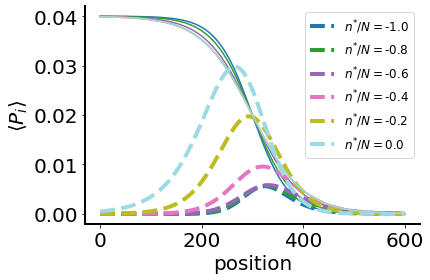

In [46]:
fig,ax=plt.subplots()

gf = 0.01
m = 0.25
dx = 0.01
x_min = -30
x_max = 30
f_pulled = -1.0
f_pseudo = -0.4
f_pushed = -0.0

import numpy as np
import matplotlib.pylab as pl

f_pulleds= np.array([-1,-.8, -.6,-.4,-.2,0])

n =len(f_pulleds)
colors = pl.cm.tab20(np.linspace(0,1,n))
for i,f_pulled in enumerate(f_pulleds):

    x_array = np.arange(x_min, x_max, 0.1)
    x_array = np.append(x_array, [x_max])
    pulled_profile = np.array([profile(gf, m, f_pulled, x) for x in x_array])
    pulled_growth = np.array(growth(gf, f_pulled, pulled_profile))
    pulled_fixation = np.array([fixation_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_array])
    pulled_ancestry = np.array([ancestral_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_array])
    ax.plot(pulled_profile*.04,c=colors[i])
    
    ax.plot(pulled_fixation*pulled_profile,label= '$n^{*} / N = $' + str(f_pulled),lw=4,c=colors[i],linestyle='--')
ax.legend()

ax.legend(fontsize=12)
for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


ax.set_xlabel('position',fontsize=20)

ax.set_ylabel(r'$\langle P_i \rangle$',fontsize=20)

In [25]:
 np.sum(pulled_fixation*pulled_profile)  /(.25**2/2)


160.00869978472218

In [6]:
gf = 0.01
m = 0.25
dx = 0.01
x_min = -30
x_max = 30
f_pulled = -.4
f_pseudo = -0.4
f_pushed = -0.0

gf = 0.01
m = 0.25
dx = 0.01
x_min = -30
x_max = 30
f_pulled = -1.0
f_pseudo = -0.4
f_pushed = -0.0

x_array = np.arange(x_min, x_max, 0.1)
x_array = np.append(x_array, [x_max])
pulled_profile = np.array([profile(gf, m, f_pulled, x) for x in x_array])
pulled_growth = np.array(growth(gf, f_pulled, pulled_profile))
pulled_fixation = np.array([fixation_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_array])
pulled_ancestry = np.array([ancestral_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_array])
pseudo_profile = np.array([profile(gf, m, f_pseudo, x) for x in x_array])
pseudo_growth = np.array(growth(gf, f_pseudo, pulled_profile))
pseudo_fixation = np.array([fixation_probability(gf, m, f_pseudo, x_min, x_max, dx, x) for x in x_array])
pseudo_ancestry = np.array([ancestral_probability(gf, m, f_pseudo, x_min, x_max, dx, x) for x in x_array])
pushed_profile = np.array([profile(gf, m, f_pushed, x) for x in x_array])
pushed_growth = np.array(growth(gf, f_pushed, pushed_profile))
pushed_fixation = np.array([fixation_probability(gf, m, f_pushed, x_min, x_max, dx, x) for x in x_array])
pushed_ancestry = np.array([ancestral_probability(gf, m, f_pushed, x_min, x_max, dx, x) for x in x_array])


gf = 0.01
m = 0.25
dx = 0.01
x_min = -30
x_max = 30
f_pulled = -.4
f_pseudo = -0.4
f_pushed = -0.0

for f_pulled in np.array([-.6]):
    pulled_profile = np.array([profile(gf, m, f_pulled, x) for x in x_array])
    pulled_growth = np.array(growth(gf, f_pulled, pulled_profile))
    pulled_fixation = np.array([fixation_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_array])
    pulled_ancestry = np.array([ancestral_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_array])
    
    plt.plot(pulled_ancestry)

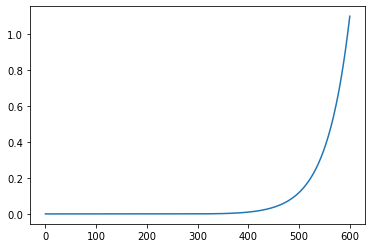

In [5]:
plt.plot(pulled_ancestry)
#plt.plot(pulled_profile)
#plt.plot(pulled_ancestry)

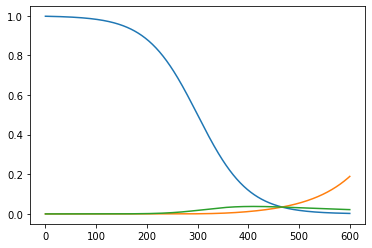

In [134]:
#plt.plot(pushed_fixation)
#plt.plot(pushed_profile)
plt.plot(pseudo_profile)
plt.plot(pseudo_ancestry)
plt.plot(pseudo_fixation)

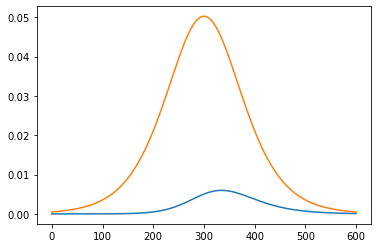

In [135]:
plt.plot(pushed_ancestry)
plt.plot(pushed_fixation)

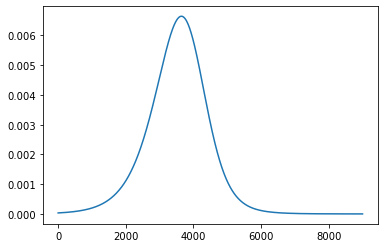

In [103]:
plt.plot(pushed_profile*pushed_growth)

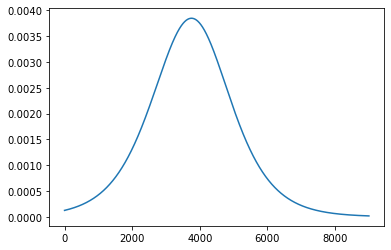

In [101]:
plt.plot(pulled_profile*pulled_growth)

In [154]:
gf = 0.01
gf_pushed = 0.04
m = 1.25
dx = 0.01
x_min = -50
x_max = 150
f_pulled = -1.0
f_pushed = -0.08

x_array = np.arange(x_min, x_max, 0.01)
x_fix = np.arange(x_min, x_max, 0.3)
pulled_profile = np.array([profile(gf, m, f_pulled, x) for x in x_fix])
pulled_fixation = np.array([fixation_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_fix])
pulled_ancestral = np.array([ancestral_probability(gf, m, f_pulled, x_min, x_max, dx, x) for x in x_fix])

pushed_profile = np.array([profile(gf_pushed, m, f_pushed, x) for x in x_fix])
pushed_fixation = np.array([fixation_probability(gf_pushed, m, f_pushed, x_min, x_max, dx, x) for x in x_fix])
pushed_ancestral = np.array([ancestral_probability(gf_pushed, m, f_pushed, x_min, x_max, dx, x) for x in x_fix])

In [68]:
def fixation_const1(gf, migr, fstr, x_min, x_max, dx):
    x_arr = np.arange(x_min, x_max, dx)
    c_arr = profile(gf, migr, fstr, x_arr)
    v = velocity(gf, migr, fstr)
    D = migr/2.

    prelim_prob = c_arr**2*np.exp(v*x_arr/D)
    const = integrate.simps(prelim_prob, x_arr)
    return const

def fixation_probability1(gf, migr, fstr, x_min, x_max, dx, x):
    c = profile(gf, migr, fstr, x)
    v = velocity(gf, migr, fstr)
    D = migr/2.
    const = fixation_const(gf, migr, fstr, x_min, x_max, dx)
    prob = c**2*np.exp(v*x/D)
    return prob

def ancestral_probability1(gf, migr, fstr, x_min, x_max, dx, x):
    c = profile(gf, migr, fstr, x)
    v = velocity(gf, migr, fstr)
    D = migr/2.
    const = fixation_const(gf, migr, fstr, x_min, x_max, dx)
    prob = c**3*np.exp(2*v*x/D)
    return prob

In [86]:
pushed_profile = np.array([profile(gf_pushed, m, f_pushed, x) for x in x_fix])
pushed_fixation = np.array([fixation_probability1(gf_pushed, m, f_pushed, x_min, x_max, dx, x) for x in x_fix])
pushed_ancestral = np.array([ancestral_probability1(gf_pushed, m, f_pushed, x_min, x_max, dx, x) for x in x_fix])

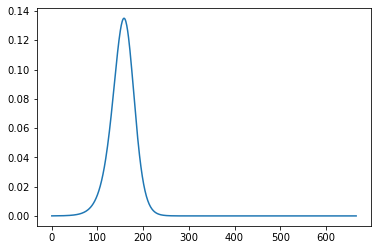

In [95]:
plt.plot(pushed_fixation*pushed_profile)

In [32]:
plt.plot(pushed_ancestral)

NameError: name 'pushed_ancestral' is not defined

0.005900465527272794

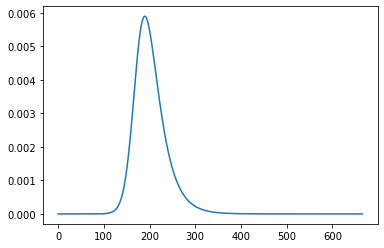

In [156]:
plt.plot(pushed_ancestral)
#plt.plot(pulled_ancestral)


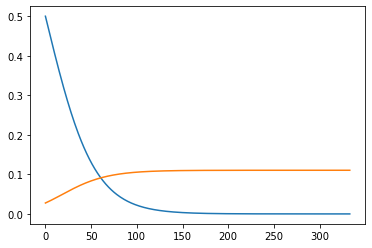

In [125]:
plt.plot(pulled_profile)
plt.plot(pulled_fixation*10)



In [17]:
x_array = np.arange(x_min, x_max, 0.01)
x_fix = np.arange(x_min, x_max, 0.1)

<function __main__.fixation_probability(gf, migr, fstr, x_min, x_max, dx, x)>

In [22]:
profile(gf, 1, -.08, x)

NameError: name 'x' is not defined

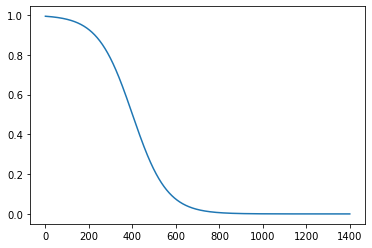

In [19]:
plt.plot(pulled_profile)

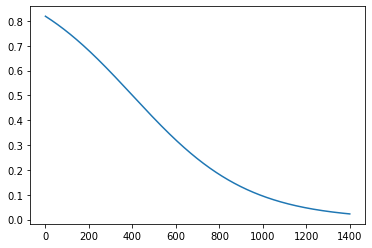

In [29]:
D=1.125/2
fp=-.08
gf = .01
x_fix = np.arange(x_min, x_max, 0.1)
plt.plot(1./(1. + np.exp(np.sqrt(gf*abs(fp)/D)*x_fix)))

In [143]:

x_min = -100
x_max = 100
f_pulled = -1.0
f_pushed = -0.08

x_array = np.arange(x_min, x_max, 0.01)
x_fix = np.arange(x_min, x_max, 0.1)
migr=1.125
D = migr/2.
fstr  =-1
if fstr > -0.5:
    c = 1./(1. + np.exp(np.sqrt(gf/(2.*D))*x_fix))
else:
    c = 1./(1. + np.exp(np.sqrt(gf*abs(fstr)/D)*x_fix))


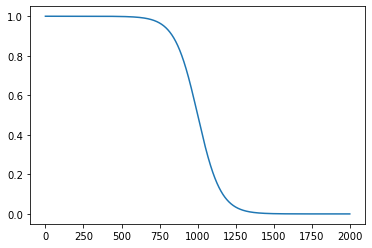

In [82]:
plt.plot(c)

In [152]:
#c = profile(gf, migr, fstr, x)
v = velocity(gf, migr, fstr)
D = migr/2.
const = fixation_const(gf, migr, fstr, x_min, x_max, dx)
prob = c**2*np.exp(v*x_fix/D)

In [153]:
D

0.5625

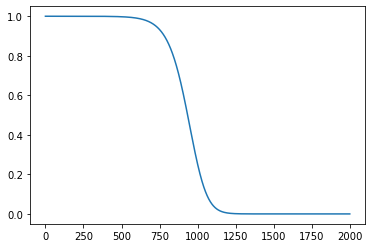

In [154]:
plt.plot(c**2)

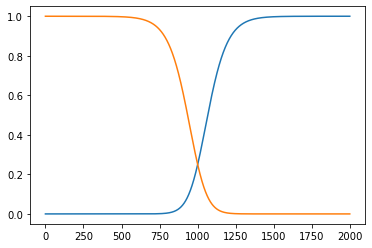

In [155]:
plt.plot(prob)
plt.plot(c**2)
#plt.plot(np.exp(v*x_fix/D))

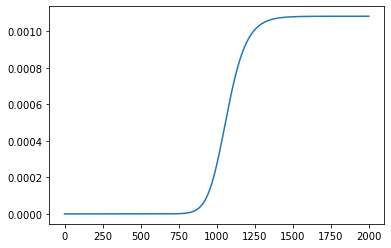

In [158]:
plt.plot(prob/np.sum(prob))

In [162]:
np.sum(prob/np.sum(prob))

1.0

In [160]:
gf

0.01

In [132]:
r=.1
c_1=1
t=100
x =np.linspace(0,100,1000)

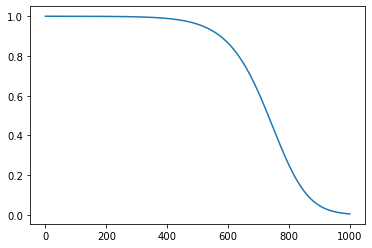

In [137]:
plt.plot((1/4)* (np.tanh(c_1 + (5*r*t)/12 - (np.sqrt(r)*x)/(2*np.sqrt(6))) + 1)**2)

In [136]:
np.sqrt


<ufunc 'sqrt'>